11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 33ms/step - accuracy: 0.9168 - loss: 0.2868 - val_accuracy: 0.9858 - val_loss: 0.0433
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9866 - loss: 0.0422 - val_accuracy: 0.9879 - val_loss: 0.0372
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9916 - loss: 0.0260 - val_accuracy: 0.9922 - val_loss: 0.0256
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 32ms/step - accuracy: 0.9940 - loss: 0.0184 - val_accuracy: 0.9902 - val_loss: 0.0353
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9955 - loss: 0.0140 - val_accuracy: 0.9912 - val_loss: 0.0274


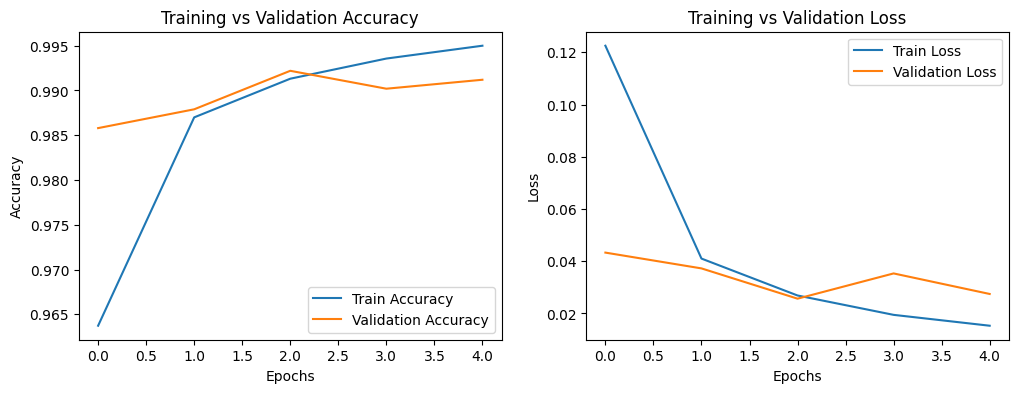

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import numpy as np

# Load and Preprocess the MNIST Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape to add channel dimension
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Convert labels to categorical format
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Define a Basic CNN Model
def build_basic_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile and Train the Model
model = build_basic_cnn()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Evaluate the Model
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training vs Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')

    plt.show()

plot_history(history)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 49ms/step - accuracy: 0.8154 - loss: 0.8957 - val_accuracy: 0.9794 - val_loss: 0.2683
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 49ms/step - accuracy: 0.9600 - loss: 0.3328 - val_accuracy: 0.9858 - val_loss: 0.2293
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 48ms/step - accuracy: 0.9665 - loss: 0.2892 - val_accuracy: 0.9882 - val_loss: 0.2150
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 94s 50ms/step - accuracy: 0.9702 - loss: 0.2644 - val_accuracy: 0.9868 - val_loss: 0.2055
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 140s 49ms/step - accuracy: 0.9692 - loss: 0.2705 - val_accuracy: 0.9866 - val_loss: 0.2021
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 142s 49ms/step - accuracy: 0.9722 - loss: 0.2474 - val_accuracy: 0.9877 - val_loss: 0.1966
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 49ms/step - accuracy: 0.9727 - loss: 0.2480 - val_accuracy: 0.9848 - val_loss: 0.2017
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 139s 48ms/step - accuracy: 0.9

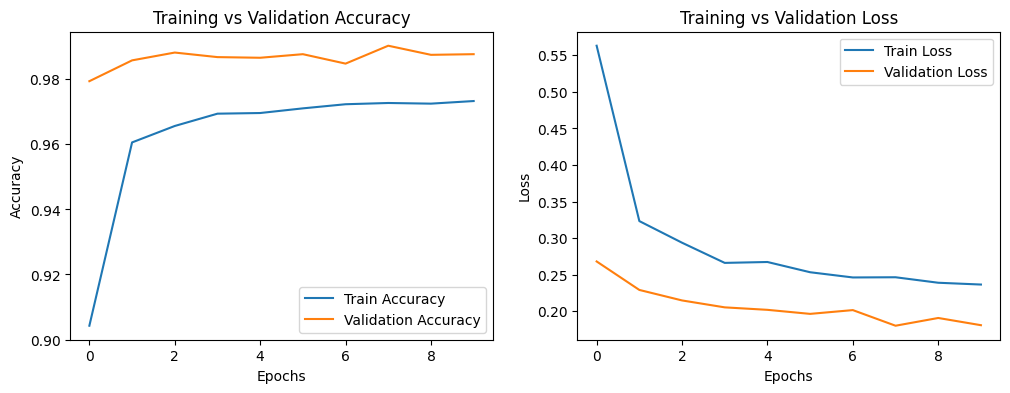

In [2]:
# Task 3b: Improve CNN with Regularization and Batch Normalization
def build_improved_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28, 28, 1)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Compile and Train the Improved Model
improved_model = build_improved_cnn()
improved_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_improved = improved_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the Improved Model
plot_history(history_improved)
